In [ ]:
import os
!pip install pandas
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from matplotlib.pyplot import imread
from IPython.display import Image
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from PIL import Image

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
labels_csv = pd.read_csv('/content/gdrive/MyDrive/dogs/labels.csv')
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
folder_path = "/content/gdrive/MyDrive/dogs"

In [ ]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


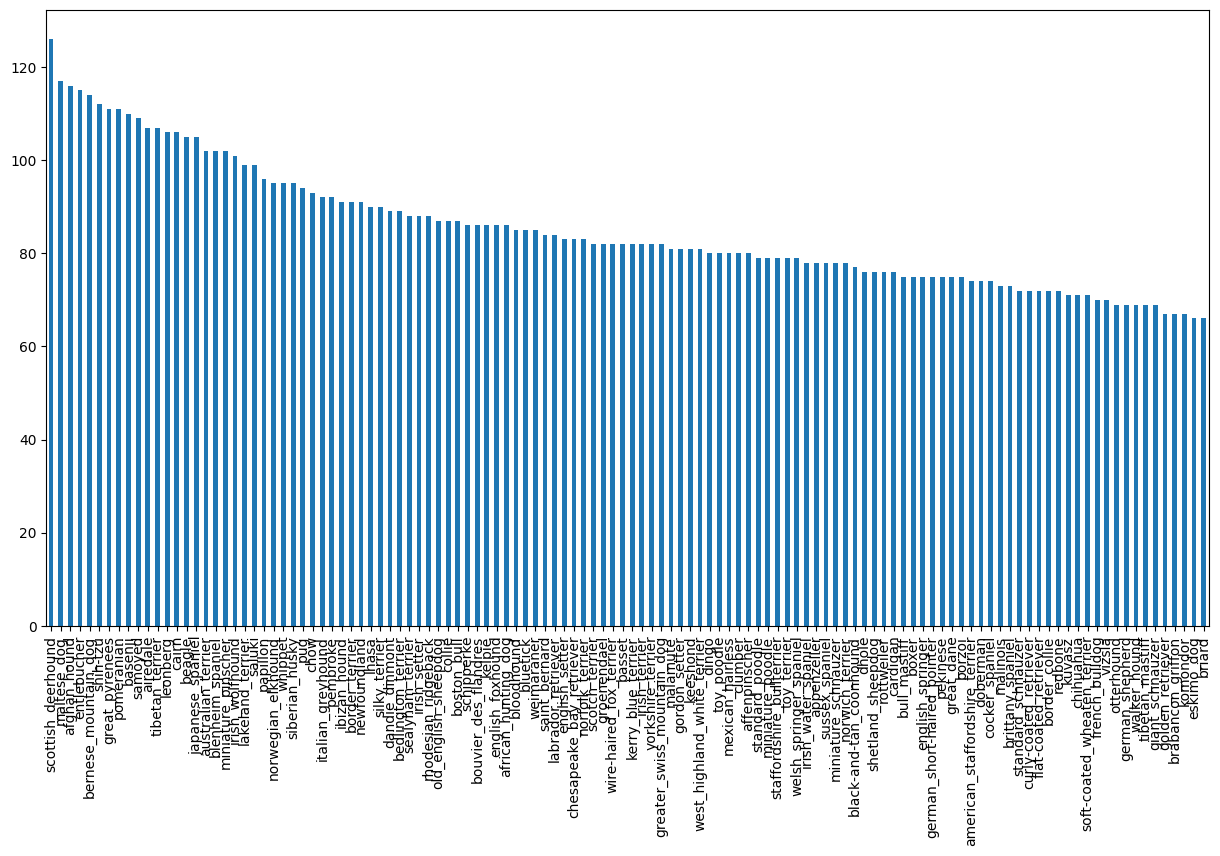

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(15,8));

In [ ]:
1# What's the median number of images per class?
labels_csv["breed"].value_counts().median()

82.0

In [ ]:
# Sample image from the set
Image("/content/gdrive/My Drive/dogs/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

TypeError: 'module' object is not callable

In [ ]:
filepaths = ["/content/gdrive/MyDrive/dogs/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filepaths[:10]

['/content/gdrive/MyDrive/dogs/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/gdrive/MyDrive/dogs/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/gdrive/MyDrive/dogs/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/gdrive/MyDrive/dogs/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/gdrive/MyDrive/dogs/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/gdrive/MyDrive/dogs/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/gdrive/MyDrive/dogs/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/gdrive/MyDrive/dogs/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/gdrive/MyDrive/dogs/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/gdrive/MyDrive/dogs/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
base_dir="."
data_dir=os.path.join("/content/gdrive/MyDrive/dogs/train/")
filepaths=os.listdir(data_dir)

In [ ]:
for i in range(len(filepaths)):
  filepaths[i]=filepaths[i].replace('.jpg','')

In [ ]:
id_file=pd.DataFrame({'id': filepaths})
id_file

,id
0,ed154eec8a5e855fabc7c6e37edbac1c
1,de9c66567290fc6574e102d21dc3a957
2,e86503273b282ab18bd09c6b6ef63de7
3,e93489f9d52d63c373264b27daabf420
4,ece94a0e987ed8316c4b3e4ed9e49477
...,...
10216,0255a5bca3b9d91d4fdba8d7419b5e69
10217,03dc61595ad9dbf49e3998cf586ca8cb
10218,07f1b6214597af2f04a27c375a602a0c
10219,052675b01ae0a4b62e090923d131f4ff


In [ ]:
data = {'id': labels_csv}

In [ ]:
mapping_index=pd.merge(left=id_file,right=labels_csv)
mapping_index.head()

,id,breed
0,ed154eec8a5e855fabc7c6e37edbac1c,west_highland_white_terrier
1,de9c66567290fc6574e102d21dc3a957,african_hunting_dog
2,e86503273b282ab18bd09c6b6ef63de7,yorkshire_terrier
3,e93489f9d52d63c373264b27daabf420,welsh_springer_spaniel
4,ece94a0e987ed8316c4b3e4ed9e49477,appenzeller


In [ ]:
if len(os.listdir("/content/gdrive/MyDrive/dogs/train/")) == len(filepaths):
  print("filepaths match actual amount of files")
else:
  print("filepaths do no match actual amount of files, check the target directory.")

In [ ]:
labels = labels_csv["breed"]
labels.head()

0         boston_bull
1               dingo
2            pekinese
3            bluetick
4    golden_retriever
Name: breed, dtype: object

In [ ]:
labels = np.array(labels)

In [ ]:
if len(filepaths) == len(labels):
  print("Labels match actual amount of files")
else:
  print("Labels do no match actual amount of files, check the target directory.")

In [ ]:
unique_labels = np.unique(labels)
unique_labels.size

120

In [ ]:
# Turning labels data into a boolean array - example with sigle lavel
labels[0] == unique_labels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turning every label into a boolean array
boolean_labels = np.array([label == unique_labels for label in labels])
boolean_labels.shape

(10222, 120)

In [ ]:
# Example: Turning boolean array into integers
print(labels[1]) # original label
print(np.where(boolean_labels == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

dingo
(array([], dtype=int64), array([], dtype=int64))
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
binary_labels = boolean_labels.astype(int)
binary_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
unique_labels = labels_csv['breed'].unique()
print("Unique dog breed labels:", unique_labels)

Unique dog breed labels: ['boston_bull' 'dingo' 'pekinese' 'bluetick' 'golden_retriever'
 'bedlington_terrier' 'borzoi' 'basenji' 'scottish_deerhound'
 'shetland_sheepdog' 'walker_hound' 'maltese_dog' 'norfolk_terrier'
 'african_hunting_dog' 'wire-haired_fox_terrier' 'redbone'
 'lakeland_terrier' 'boxer' 'doberman' 'otterhound' 'standard_schnauzer'
 'irish_water_spaniel' 'black-and-tan_coonhound' 'cairn' 'affenpinscher'
 'labrador_retriever' 'ibizan_hound' 'english_setter' 'weimaraner'
 'giant_schnauzer' 'groenendael' 'dhole' 'toy_poodle' 'border_terrier'
 'tibetan_terrier' 'norwegian_elkhound' 'shih-tzu' 'irish_terrier'
 'kuvasz' 'german_shepherd' 'greater_swiss_mountain_dog' 'basset'
 'australian_terrier' 'schipperke' 'rhodesian_ridgeback' 'irish_setter'
 'appenzeller' 'bloodhound' 'samoyed' 'miniature_schnauzer'
 'brittany_spaniel' 'kelpie' 'papillon' 'border_collie' 'entlebucher'
 'collie' 'malamute' 'welsh_springer_spaniel' 'chihuahua' 'saluki' 'pug'
 'malinois' 'komondor' 'aireda

In [ ]:
unique_labels = np.unique(labels)
unique_labels.size

120

In [ ]:
X = np.array(filepaths)
y = binary_labels
X.shape, y.shape

((10221,), (10222, 120))

In [ ]:
NUM_IMAGES = 10221 #@param {type: "slider", min: 1000, max: 10221, step: 1000

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(8176, 8176, 2045, 2045)

In [ ]:
image_path = "/content/gdrive/MyDrive/dogs/train/e93489f9d52d63c373264b27daabf420.jpg"
image = imread(image_path)
image.shape

(375, 500, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[ 29,  32,  23],
        [116, 119, 110],
        [ 80,  83,  74],
        ...,
        [ 36,  26,  35],
        [ 29,  19,  28],
        [ 26,  16,  25]],

       [[  9,  12,   3],
        [ 79,  82,  73],
        [ 89,  92,  83],
        ...,
        [ 39,  29,  38],
        [ 37,  27,  36],
        [ 36,  26,  35]]], dtype=uint8)>

In [ ]:
def show_25_images(images, labels):

  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5,5, i+1)
    plt.imshow(images[i])
    breed = unique_labels[(labels[i].argmax())]
    plt.title(breed)
    plt.axis("off")

In [ ]:
num_classes = 120

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    folder_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 10221 images belonging to 1 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    folder_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 10221 images belonging to 1 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_generator, epochs=10,
validation_data=validation_generator)


Epoch 1/10
320/320 [==============================] - 1031s 3s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
320/320 [==============================] - 1019s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
320/320 [==============================] - 1074s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
320/320 [==============================] - 1076s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
320/320 [==============================] - 1022s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
320/320 [==============================] - 1074s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
320/320 [==============================] - 1031s 3s/step - loss: 0.0000e+00 - acc

In [ ]:
model.fit(train_generator, epochs=1,
validation_data=validation_generator)


320/320 [==============================] - 2434s 8s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [ ]:
model.evaluate(validation_generator)

320/320 [==============================] - 273s 851ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
model.save('/content/gdrive/MyDrive/dog classifier/dogmodel.h5')

NameError: name 'model' is not defined

In [ ]:
model_path = '/content/gdrive/MyDrive/dog classifier/dogmodel.h5'
model = load_model(model_path)